In [140]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [141]:
df=pd.read_excel('res.xlsx')
df

,Parameters & Calculations,Sample,P10,P50,P90,Average
0,"Area, acres",NaN,320.00,360.00,400.00,360.000000
1,"Average Thickness, ft",NaN,80.00,100.00,140.00,106.666667
2,"Porosity, %",NaN,0.17,0.20,0.25,0.206667
3,"Water Saturation, %",NaN,0.30,0.35,0.45,0.366667
4,Net:Gross,NaN,0.60,0.70,0.80,0.700000
5,Formation Volume Factor,NaN,1.15,1.20,1.30,1.216667
6,Recovery Factor,NaN,0.20,0.30,0.45,0.316667


In [142]:
#Parameters percentiles

area_10_50_90=np.asarray(df.iloc[0,2:5]).T
h_10_50_90=np.asarray(df.iloc[1,2:5]).T
poro_10_50_90=np.asarray(df.iloc[2,2:5]).T
sat_10_50_90=np.asarray(df.iloc[3,2:5]).T
ntg_10_50_90=np.asarray(df.iloc[4,2:5]).T
fvl_10_50_90=np.asarray(df.iloc[5,2:5]).T
RF_10_50_90=np.asarray(df.iloc[6,2:5]).T

In [143]:
#Triangular distribution for parameters

n_samples=100
area=np.random.triangular(area_10_50_90[0],area_10_50_90[1],area_10_50_90[2],n_samples)
h=np.random.triangular(h_10_50_90[0],h_10_50_90[1],h_10_50_90[2],n_samples)
poro=np.random.triangular(poro_10_50_90[0],poro_10_50_90[1],poro_10_50_90[2],n_samples)
sat=np.random.triangular(sat_10_50_90[0],sat_10_50_90[1],sat_10_50_90[2],n_samples)
ntg=np.random.triangular(ntg_10_50_90[0],ntg_10_50_90[1],ntg_10_50_90[2],n_samples)
fvl=np.random.triangular(fvl_10_50_90[0],fvl_10_50_90[1],fvl_10_50_90[2],n_samples)
RF=np.random.triangular(RF_10_50_90[0],RF_10_50_90[1],RF_10_50_90[2],n_samples)

area.shape

(100,)

<AxesSubplot:>

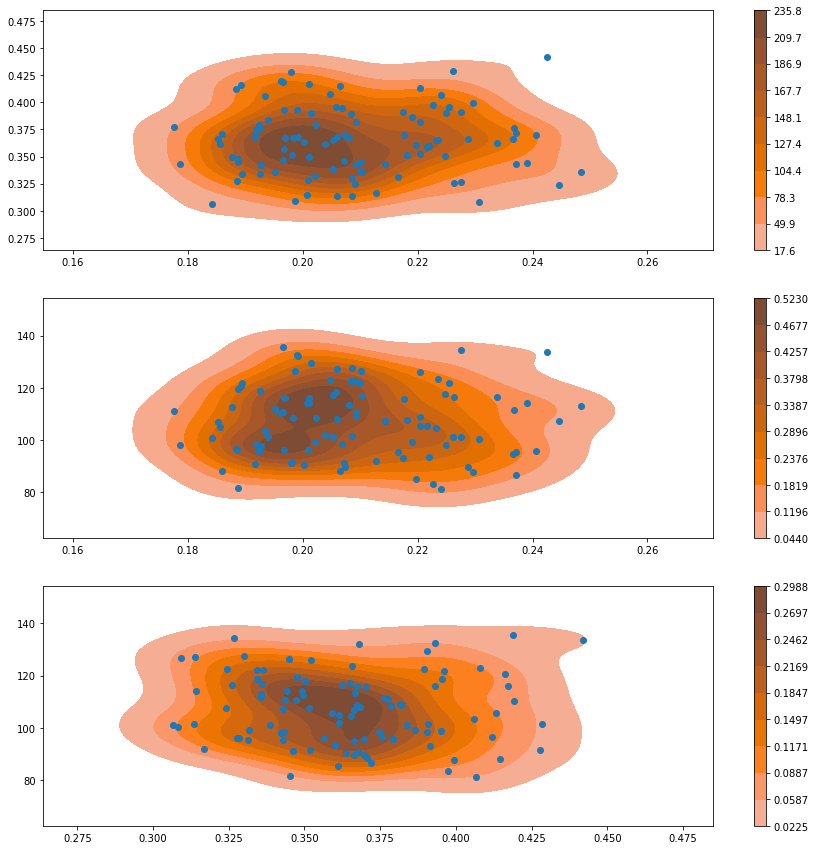

In [144]:
#Uncorrelated parameters: 
#Porosity, Thickness and Saturation

fig, axs = plt.subplots(3,1,figsize=(15,15))

axs[0].plot(poro,sat,'o')
sns.kdeplot(ax=axs[0], x=poro,y=sat,cbar=True,fill=True)

axs[1].plot(poro,h,'o')
sns.kdeplot(ax=axs[1], x=poro,y=h,cbar=True,fill=True)

axs[2].plot(sat,h,'o')
sns.kdeplot(ax=axs[2], x=sat,y=h,cbar=True,fill=True)

In [145]:
X=np.stack((poro,sat,h),axis=1)

In [146]:
n_param = 3
rho = np.ones(n_param)
rho = np.asmatrix(np.diag(rho))

In [147]:
#Correlation matrix

rho[0,1] = -0.5
rho[1,0] = rho[0,1]
rho[1,2] = 0.5
rho[2,1] = rho[1,2]
rho[0,2] = -0.8
rho[2,0] = rho[0,2]

rho

matrix([[ 1. , -0.5, -0.8],
        [-0.5,  1. ,  0.5],
        [-0.8,  0.5,  1. ]])

In [148]:
R_sqt=np.asmatrix(np.linalg.cholesky(rho)) #Lower-triangular Cholesky factor

R_sqt 

matrix([[ 1.        ,  0.        ,  0.        ],
        [-0.5       ,  0.8660254 ,  0.        ],
        [-0.8       ,  0.11547005,  0.58878406]])

In [149]:
n_real=40 #number of realizations
Z = np.asmatrix(np.random.randn(3,n_real)) #random normal distribution
S = R_sqt*Z 
S

matrix([[-0.11933346, -0.79946221,  0.55284852, -1.94246501,  0.07402491,
          1.73518555, -0.74061983, -0.11410882,  1.31851142, -1.69719694,
          0.82734481, -0.56901773,  0.73508098, -0.28340036, -2.05045401,
         -1.03357101, -1.75731121,  0.38657631,  1.09012166,  0.43948173,
          0.02355896,  0.99722838,  0.33563594,  0.76149683, -0.35162429,
         -0.54827223, -0.1302219 , -0.7402052 , -0.36663338,  1.08401918,
         -0.33948949,  0.67575213,  1.26464508, -0.13691982, -0.83191991,
          0.35965983, -1.9540542 ,  0.36047235, -1.58510201,  1.54510454],
        [-0.64057727,  1.72967143,  0.19876517,  0.86321561, -0.12687383,
         -0.94210305,  1.2466802 , -0.02836288, -1.80857239, -0.44052909,
          0.32877607, -1.13717771,  0.5440888 ,  1.09548813,  2.36647722,
          0.53859343,  0.55608827, -0.22224479,  0.82037228, -1.32295961,
          0.82489223, -0.03785832,  0.40350336, -1.5104465 ,  0.44129083,
          1.37645625,  0.18935237,  0

In [150]:
#Denormalization for triangular distribution

X_min=np.stack((poro_10_50_90[0],sat_10_50_90[0],h_10_50_90[0]),axis=0)
X_max=np.stack((poro_10_50_90[2],sat_10_50_90[2],h_10_50_90[2]),axis=0)

In [151]:
S_min=np.min(S, axis=0)
S_max=np.max(S, axis=0)

In [152]:
m=(X_max-X_min)/(S_max-S_min).T

samples=np.multiply(m,(S-S_min).T)+X_min #correlated samples
samples.shape

(40, 3)

In [153]:
poro_samp=np.asarray(samples.T[0])
sat_samp=np.asarray(samples.T[1])
h_samp=np.asarray(samples.T[2])

<AxesSubplot:>

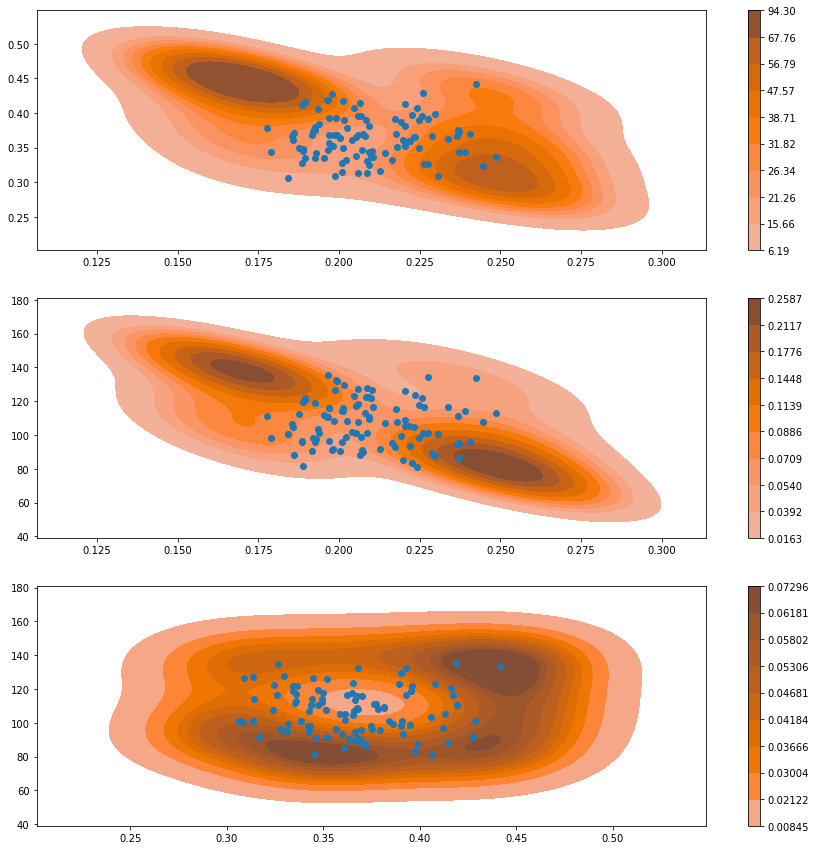

In [154]:
#Correlated parameters

fig, axs = plt.subplots(3,1,figsize=(15,15))

axs[0].plot(poro,sat,'o')
sns.kdeplot(ax=axs[0], x=poro_samp[0],y=sat_samp[0],cbar=True,fill=True)

axs[1].plot(poro,h,'o')
sns.kdeplot(ax=axs[1], x=poro_samp[0],y=h_samp[0],cbar=True,fill=True)

axs[2].plot(sat,h,'o')
sns.kdeplot(ax=axs[2], x=sat_samp[0],y=h_samp[0],cbar=True,fill=True)

In [155]:
#Random sampling from triangular distribution for the rest of uncorrelated parameters

area_samp=(np.random.choice(area, n_real))
ntg_samp=(np.random.choice(ntg, n_real))
fvl_samp=(np.random.choice(fvl, n_real))
RF_samp=(np.random.choice(RF, n_real))

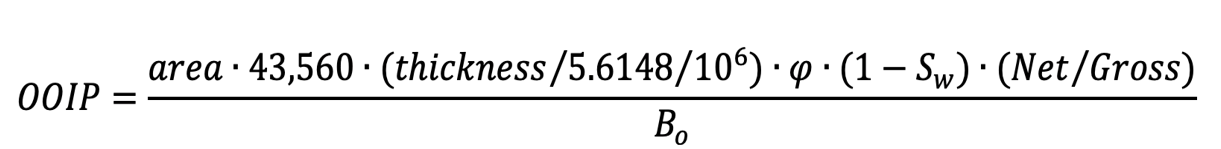

(array([ 3.,  5.,  9., 11.,  3.,  5.,  0.,  1.,  1.,  2.]),
 array([0.01265243, 0.01536483, 0.01807722, 0.02078962, 0.02350202,
        0.02621441, 0.02892681, 0.03163921, 0.0343516 , 0.037064  ,
        0.0397764 ]),
 <BarContainer object of 10 artists>)

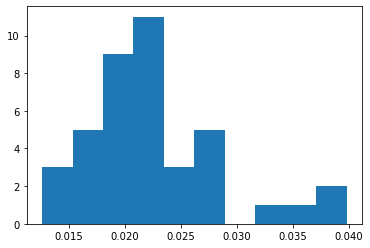

In [156]:
Ah=area_samp*43.56*h_samp/5.6148
OOIP=np.divide((Ah*poro_samp*(1-sat_samp)*ntg_samp),fvl_samp*10**6)
plt.hist(OOIP[0])

(array([4., 5., 8., 9., 3., 4., 4., 1., 0., 2.]),
 array([0.00349064, 0.00445091, 0.00541119, 0.00637146, 0.00733174,
        0.00829202, 0.00925229, 0.01021257, 0.01117285, 0.01213312,
        0.0130934 ]),
 <BarContainer object of 10 artists>)

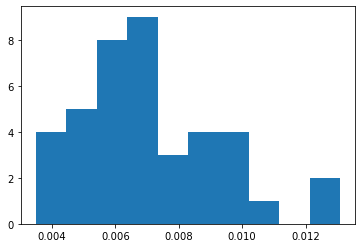

In [157]:
res=OOIP*RF_samp
plt.hist(res[0])

## Sensitivity analysis

In [158]:
#Check whether the correlation matrix is positive definite for Cholesky decomposition

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [159]:
area_samp=(np.random.choice(area))
ntg_samp=(np.random.choice(ntg))
fvl_samp=(np.random.choice(fvl))
RF_samp=(np.random.choice(RF))

corr1=np.arange(-1,0,0.1) # - poro vs sat
corr2=np.arange(-1,0,0.1) # - poro vs h
corr3=np.arange(0,1,0.1) # - sat vs h

D = {'OOIP': [], 'res': [], 'rho': []} 


for i,k,j in zip(range(0,len(corr1)), range(0,len(corr2)), range(0,len(corr3))):
    
    n_param = 3
    rho = np.ones(n_param)
    rho = np.asmatrix(np.diag(rho))
    

    rho[0,1] = corr1[i]
    rho[1,0] = rho[0,1]
    rho[1,2] = corr3[j]
    rho[2,1] = rho[1,2]
    rho[0,2] = corr2[k]
    rho[2,0] = rho[0,2]
    
    if is_pos_def(rho) == False:
        
        rho[0,1] = corr1[i+1]
        rho[1,0] = rho[0,1]
        rho[1,2] = corr3[j+1]
        rho[2,1] = rho[1,2]
        rho[0,2] = corr2[k+1]
        rho[2,0] = rho[0,2]
        
    else:
        rho
    
        r=np.asmatrix(np.linalg.cholesky(rho))
        Z = np.asmatrix(np.random.randn(3,1))
        S = r*Z
    
        X_min=np.stack((poro_10_50_90[0],sat_10_50_90[0],h_10_50_90[0]),axis=0)
        X_max=np.stack((poro_10_50_90[2],sat_10_50_90[2],h_10_50_90[2]),axis=0)
        
        S_min=np.min(S, axis=0)
        S_max=np.max(S, axis=0)
    
        m=(X_max-X_min)/(S_max-S_min).T

        samples=np.multiply(m,(S-S_min).T)+X_min
        
        poro_samp=np.asarray(samples.T[0])
        sat_samp=np.asarray(samples.T[1])
        h_samp=np.asarray(samples.T[2])
        
        Ah=area_samp*43.56*h_samp/5.6148
        
        OOIP=np.divide((Ah*poro_samp*(1-sat_samp)*ntg_samp),fvl_samp*10**6)
        
        res=OOIP*RF_samp
        
        D['OOIP'].append(OOIP)
        D['res'].append(res)            
        D['rho'].append(rho)

In [160]:
#Set of correlation coefficient values after sensitivity analysis

corr1_set=[]
corr2_set=[]
corr3_set=[]

for r in range(0,len(D.get('rho'))):
    corr1_set.append(D.get('rho')[r][0,1])
    corr2_set.append(D.get('rho')[r][0,2])  
    corr3_set.append(D.get('rho')[r][1,2])    

In [161]:
#Reserves and OOIP values after sensitivity analysis

res_set=res_set=np.asarray(D.get('res'))[:,0,0]
OOIP_set=res_set=np.asarray(D.get('OOIP'))[:,0,0]

res_set, OOIP_set

(array([0.01936938, 0.02296078, 0.02422934, 0.04174446, 0.02341569,
        0.02338603, 0.02941134]),
 array([0.01936938, 0.02296078, 0.02422934, 0.04174446, 0.02341569,
        0.02338603, 0.02941134]))

Text(0, 0.5, 'OOIP')

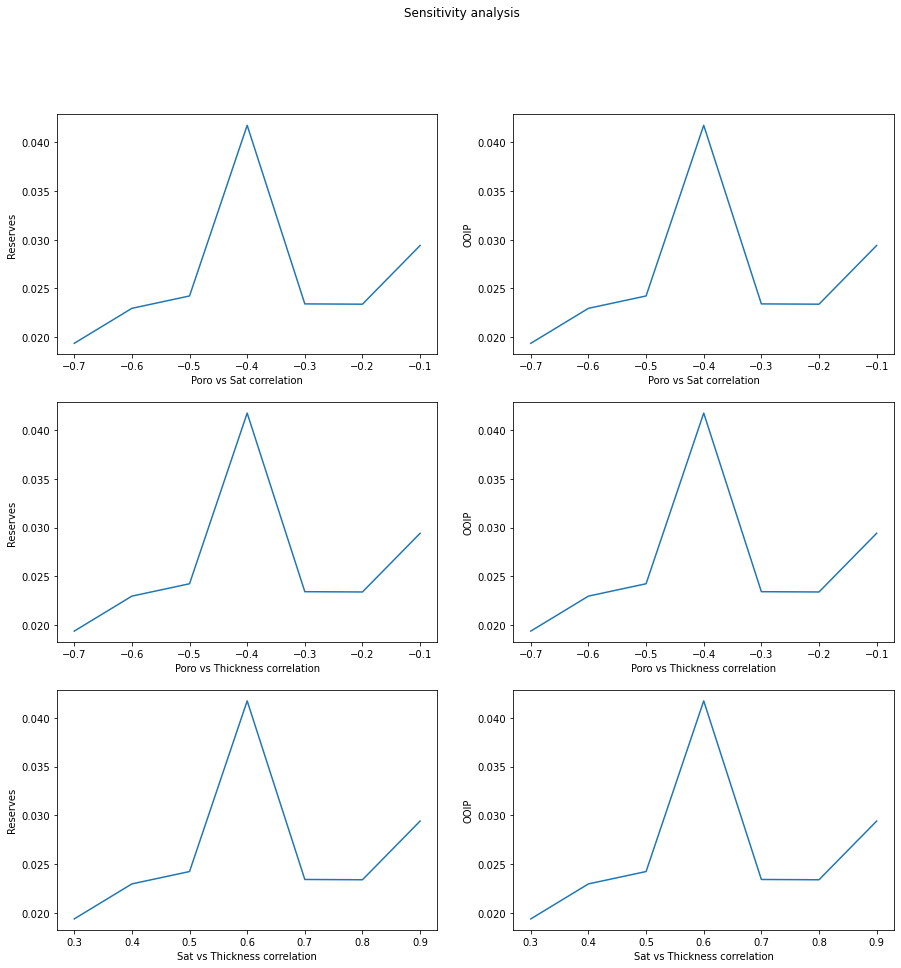

In [162]:
fig, axs = plt.subplots(3,2,figsize=(15,15))

fig.suptitle('Sensitivity analysis')

axs[0,0].plot(corr1_set, res_set)
axs[0,0].set_xlabel('Poro vs Sat correlation')
axs[0,0].set_ylabel('Reserves')

axs[1,0].plot(corr2_set, res_set)
axs[1,0].set_xlabel('Poro vs Thickness correlation')
axs[1,0].set_ylabel('Reserves')

axs[2,0].plot(corr3_set, res_set)
axs[2,0].set_xlabel('Sat vs Thickness correlation')
axs[2,0].set_ylabel('Reserves')

axs[0,1].plot(corr1_set, OOIP_set)
axs[0,1].set_xlabel('Poro vs Sat correlation')
axs[0,1].set_ylabel('OOIP')
axs[1,1].plot(corr2_set, OOIP_set)
axs[1,1].set_xlabel('Poro vs Thickness correlation')
axs[1,1].set_ylabel('OOIP')
axs[2,1].plot(corr3_set, OOIP_set)
axs[2,1].set_xlabel('Sat vs Thickness correlation')
axs[2,1].set_ylabel('OOIP')
